In [39]:
import pandas as pd
import numpy as np
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

### import data

In [2]:
data = pd.read_csv('../../Data/WeatherOutagesAllJerry.csv')

In [3]:
data = data.dropna(how = 'all')

In [4]:
data.head(5)

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Day_length_hr,Max_temp_F,Avg_Temp_F,Min_temp_F,...,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail,Event_Tornado
0,9/11/00,0.0,0.0,0.0,0.0,0.0,12.783333,66.0,58.0,50.0,...,2.0,9.0,0.01,Fog,1.0,0.0,0.0,0.0,0.0,0.0
1,9/12/00,2.0,1.0,0.0,1.0,0.0,12.716667,75.0,62.0,52.0,...,4.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,9/13/00,1.0,1.0,0.0,0.0,0.0,12.666667,77.0,64.0,54.0,...,7.0,25.0,0.00,Fog,1.0,0.0,0.0,0.0,0.0,0.0
3,9/14/00,0.0,0.0,0.0,0.0,0.0,12.616667,84.0,71.0,60.0,...,12.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,9/15/00,1.0,1.0,0.0,0.0,0.0,12.550000,73.0,66.0,59.0,...,5.0,9.0,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
np.shape(data)

(5664, 27)

In [6]:
#data = data.fillna(0)
#data = data.round(4)

In [7]:
train,test=train_test_split(data,test_size=0.1,random_state=567)

In [26]:
x_train = train.iloc[:,6:19].join(train.iloc[:,21:])
y_train = train.iloc[:,1]

x_test = test.iloc[:,6:19].join(test.iloc[:,21:])
y_test = test.iloc[:,1]

In [27]:
type(x_train)

pandas.core.frame.DataFrame

In [28]:
y_train.size

5097

In [29]:
y_test.size

567

### Decision Tree 

In [30]:
predictor = DecisionTreeRegressor(criterion='mse',max_leaf_nodes=5)

In [31]:
clf = predictor.fit(x_train,y_train)

In [32]:
y_trainpred = predictor.predict(x_train)
y_pred = predictor.predict(x_test)

In [33]:
score = mean_squared_error(y_test, y_pred)
print("Train error",mean_squared_error(y_train,y_trainpred))
print("Test error",mean_squared_error(y_test,y_pred))

Train error 3.46935439134
Test error 3.88656568529


In [36]:
tree_dot = export_graphviz(clf,out_file = 'tree_all.dot')

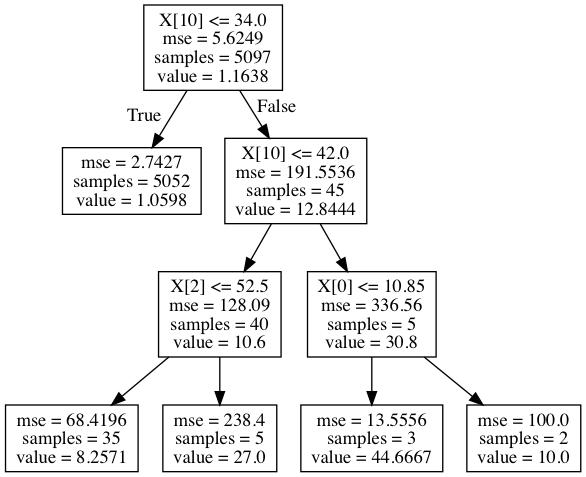

In [40]:
graph = pydotplus.graphviz.graph_from_dot_file('tree_all.dot')
Image(graph.create_png())

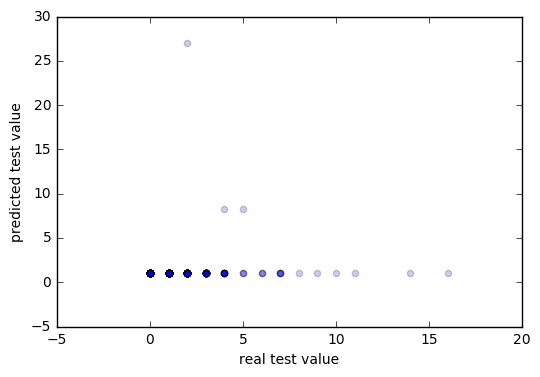

In [41]:
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('real test value')
plt.ylabel('predicted test value')

### Random Forests 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.learning_curve import validation_curve

In [ ]:
Param_name = 'max_features'
Param_range = range(1,x.shape[1]+1)

for Forest, color, lable in [(RandomForestRegressor,'g','RF'), 
                             (ExtraTreesRegressor),'r','ETs']
_, test_scores = validation_curve(
    Forest(n_estimators=100, n_jobs=-1),x,y,
    cv=ShuttleSplit(n=len(x),n_iter=10, test_size=0.25),
    scoring='mean_squared_error')
test_scores_mean = np.mean(-test_scores, axis=1)
plt.plot(param_range, test_scores_mean, label=label, color=color)